In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [64]:
data = pd.read_csv('/data/coupons.csv')

In [65]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [66]:
#  Rename passanger to passenger column
data = data.rename(columns = {'passanger' : 'passenger'})

In [67]:
# Number of records, columns
data.shape

(12684, 26)

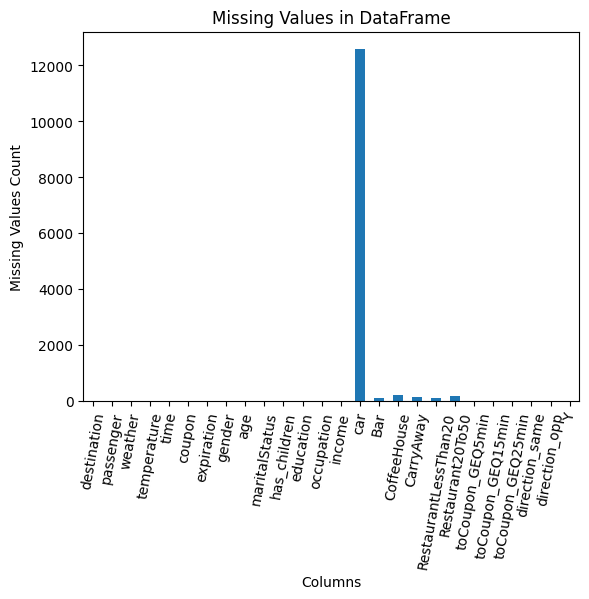

In [68]:
# Count missing values per column
missing_values = data.isnull().sum()

# Plot the missing values
missing_values.plot(kind='bar', rot=80)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values in DataFrame')
plt.show()

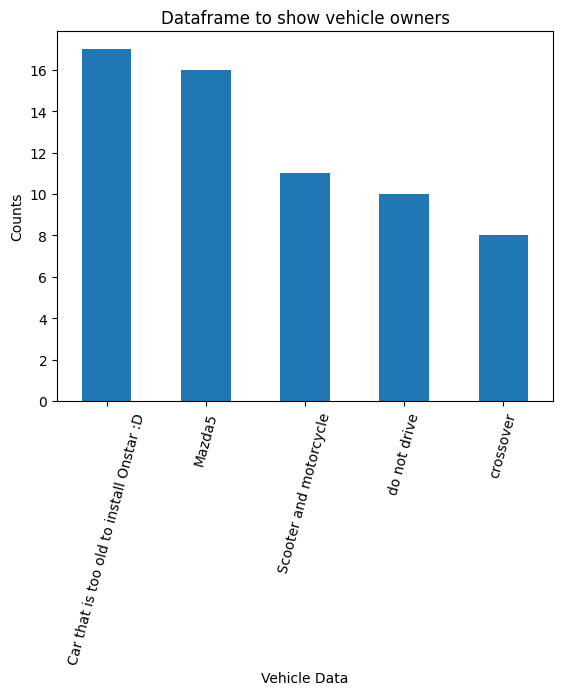

In [69]:
# Checking column that has maximum nulls if it can be dropped for people who accepted coupon in the past.
data_car_notnulls = data[data['car'].notnull()].query("Y==1")
data_car_notnulls['car'].value_counts().plot(kind='bar', rot = 75)
plt.xlabel('Vehicle Data')
plt.ylabel('Counts')
plt.title('Dataframe to show vehicle owners')
plt.show()

In [70]:
# Calculating percentage of data available looking at car column to identify customers who accept coupon while driving
data_car_accepted_coupon = data.query('(Y == 1) and (car in ["Mazda5", "crossover", "Scooter and motorcycle"])').shape[0]
data_accepted_coupons = data.query('Y == 1').shape[0]
percentage_car_accepted = (data_car_accepted_coupon/data_accepted_coupons) * 100
percentage_car_accepted

0.48543689320388345

Data collected above has less than 0.5% of car details for those who accepted coupons while driving.

Hence, not sure how these columns are relevant to predict analysis ['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min',	'direction_same',	'direction_opp']

Since problem statement is around driving 'car', it doesn't hurt to keep this data.

However as analysis progress, car column may not be significantly important.

In [71]:
# Proportion of people accepted coupon
data['Y'].value_counts(normalize = True)

,proportion
Y,
1,0.568433
0,0.431567


<ipython-input-72-d8a85e9dddb1>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  data_coupon = data.groupby('coupon').agg(sum)


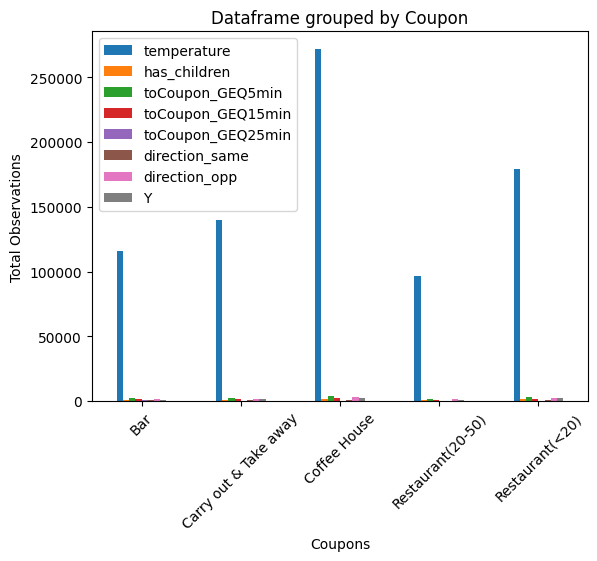

In [72]:
# Bar plot to visualize coupon column
data_coupon = data.groupby('coupon').agg(sum)
data_coupon.plot(kind = 'bar', rot = 45)
plt.xlabel('Coupons')
plt.ylabel('Total Observations')
plt.title('Dataframe grouped by Coupon')
plt.show()

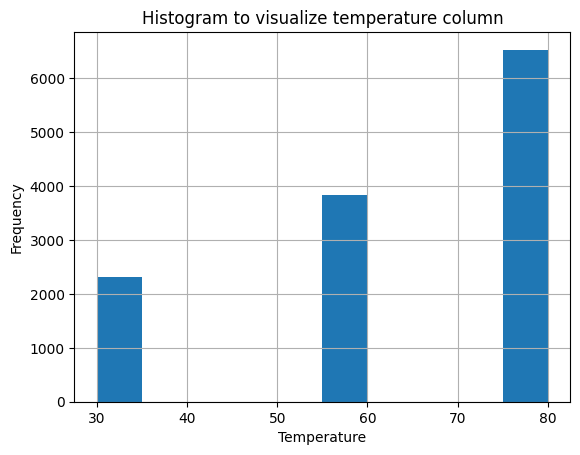

In [73]:
# Hist plot to visualize temperature column
data['temperature'].hist()
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram to visualize temperature column')
plt.show()

In [74]:
# Dataframe that contains bar coupons
data_bar_coupon = data.query('coupon == "Bar"')

# Proportion of bar coupons accepted
data_bar_coupon['Y'].value_counts(normalize = True)

,proportion
Y,
0,0.589985
1,0.410015


Text(0.5, 1.0, 'Compare acceptance by visits')

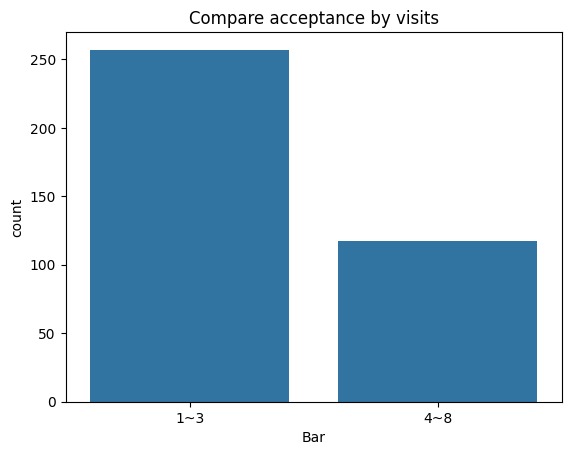

In [75]:
# Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
sns.countplot(x='Bar', data = data_bar_coupon.query('(Y == 1) and (Bar in ["1~3", "4~8"])'))
plt.title('Compare acceptance by visits')

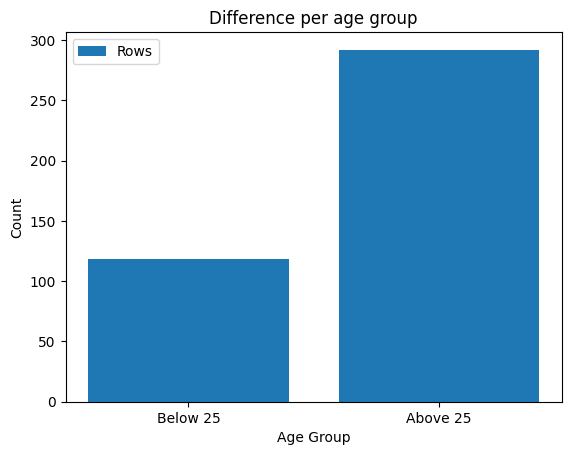

In [76]:
# Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?
data_bar_coupon_age1 = data_bar_coupon.query('(Y == 1) and (Bar in ["1~3", "4~8", "gt8"]) and age in ["21", "below21"]')
data_bar_coupon_age2 = data_bar_coupon.query('(Y == 1) and (Bar in ["1~3", "4~8", "gt8"]) and age not in ["21", "below21"]')
fig, ax = plt.subplots()
ax.bar(['Below 25', 'Above 25'], [data_bar_coupon_age1.shape[0], data_bar_coupon_age2.shape[0]], label='Rows')
ax.set_ylabel('Count')
ax.set_xlabel('Age Group')
ax.set_title('Difference per age group')
ax.legend()
plt.show()

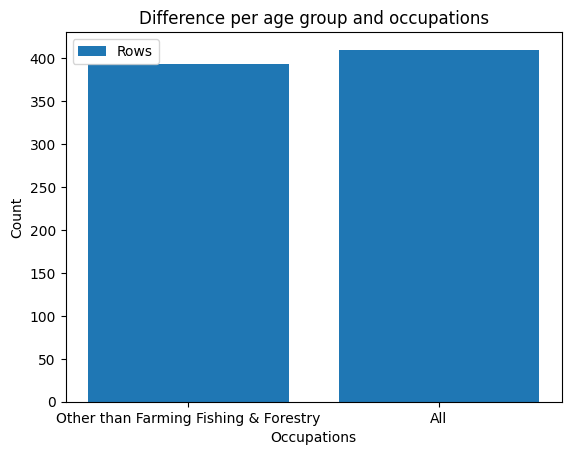

In [77]:
# Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
data_bar_coupon_pass1 = data_bar_coupon.query('(Y == 1) and (Bar in ["1~3", "4~8", "gt8"]) and (passenger not in ["Kid(s)"]) and (occupation not in ["Farming Fishing & Forestry"])')
data_bar_coupon_pass2 = data_bar_coupon.query('(Y == 1) and (Bar in ["1~3", "4~8", "gt8"])')
fig, ax = plt.subplots()
ax.bar(['Other than Farming Fishing & Forestry', 'All'], [data_bar_coupon_pass1.shape[0], data_bar_coupon_pass2.shape[0]], label='Rows')
ax.set_ylabel('Count')
ax.set_xlabel('Occupations')
ax.set_title('Difference per age group and occupations')
ax.legend()
plt.show()

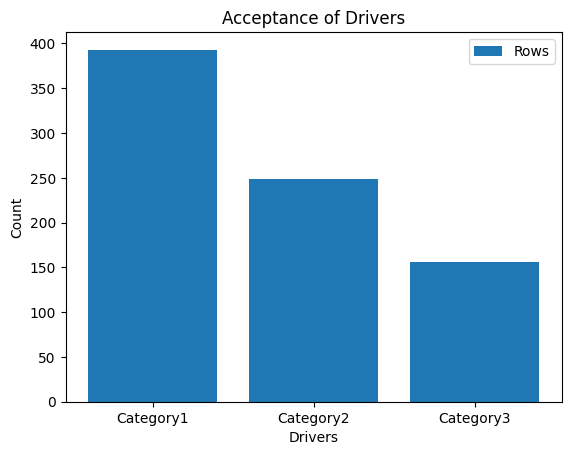

In [78]:
# Compare the acceptance rates between those drivers who:

# go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
df1 = data_bar_coupon.query('(Y == 1) and (Bar in ["1~3", "4~8", "gt8"]) and (passenger not in ["Kid(s)"]) and (maritalStatus not in ["Widowed"])')

# go to bars more than once a month and are under the age of 30 OR
df2 = data_bar_coupon.query('(Y == 1) and (Bar in ["1~3", "4~8", "gt8"]) and (age in ["21", "26", "below21"])')

# go to cheap restaurants more than 4 times a month and income is less than 50K.
df3 = data_bar_coupon.query('(Y == 1) and (RestaurantLessThan20 in ["4~8", "gt8"]) and (income in ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])')

fig, ax = plt.subplots()
ax.bar(['Category1', 'Category2', 'Category3'], [df1.shape[0], df2.shape[0], df3.shape[0]], label='Rows')
ax.set_ylabel('Count')
ax.set_xlabel('Drivers')
ax.set_title('Acceptance of Drivers')
ax.legend()
plt.show()

Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Looking at the dataset customers who are single, alone, married partners or do not have have urgent work could be the potential customers to accepts coupon.

Following are charts to analyse this assumption for each coupon category when customer accept coupon or reject coupon but did go atleast once.


In [79]:
# Creating list of important attributes that would help in determining customers willing to opt for coupons.
list_of_imp_attributes = ['destination', 'passenger', 'gender', 'maritalStatus', 'education', 'income']

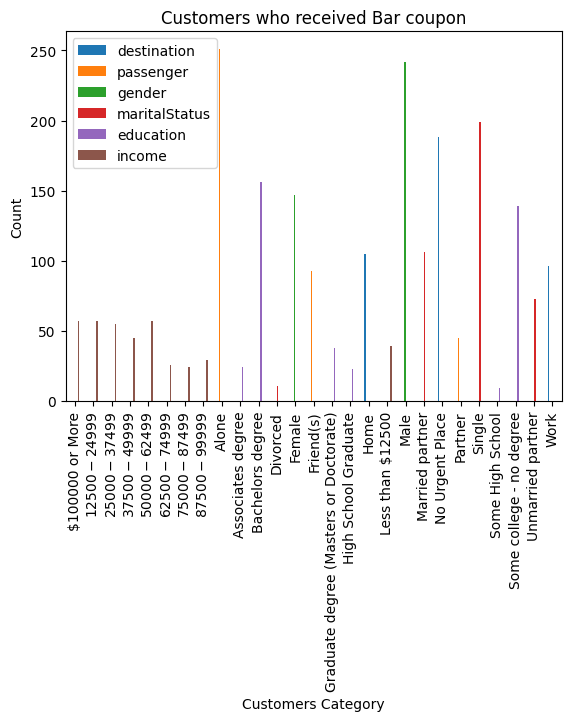

In [80]:
# Customers who did opt-in to receive bar coupon and went to bar
data_cust_bar_in = data.query('(Y == 1) and (coupon == "Bar") and (Bar in ["1~3", "4~8", "gt8"]) and (age not in ["below21"]) and (passenger not in ["Kid(s)"])')
data_cust_bar_in = data_cust_bar_in[list_of_imp_attributes]
data_cust_bar_in.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who received Bar coupon')
plt.show()

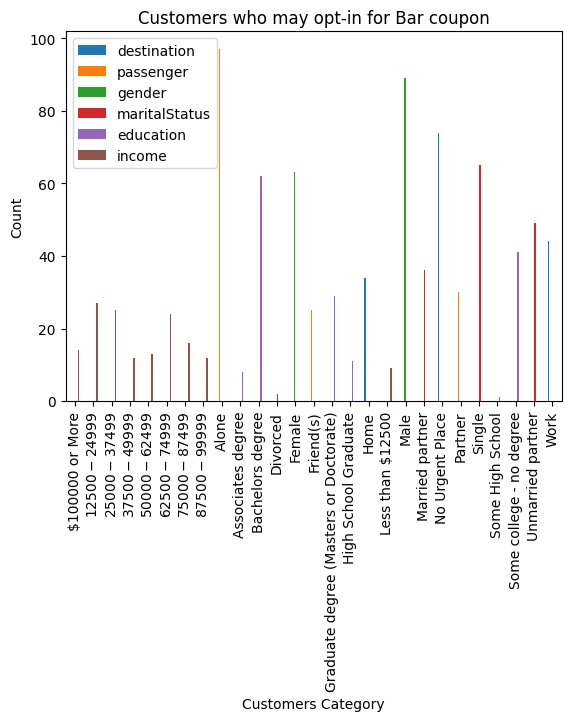

In [81]:
# Customers who did go to the bar but didn't opt-in to receive bar coupon
data_cust_bar_out = data.query('(Y == 0) and (coupon == "Bar") and (Bar in ["1~3", "4~8", "gt8"]) and (age not in ["below21"]) and (passenger not in ["Kid(s)"])')
data_cust_bar_out = data_cust_bar_out[list_of_imp_attributes]
data_cust_bar_out.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who may opt-in for Bar coupon')
plt.show()

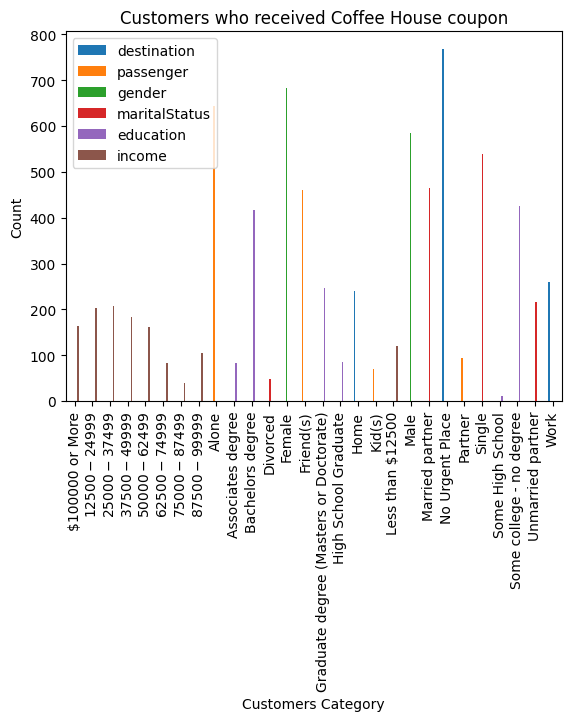

In [82]:
# Customers who did opt-in to receive coffee house coupon and went to coffee house
data_cust_coffee_in = data.query('(Y == 1) and (coupon == "Coffee House") and (CoffeeHouse in ["1~3", "4~8", "gt8"])')
data_cust_coffee_in = data_cust_coffee_in[list_of_imp_attributes]
data_cust_coffee_in.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who received Coffee House coupon')
plt.show()

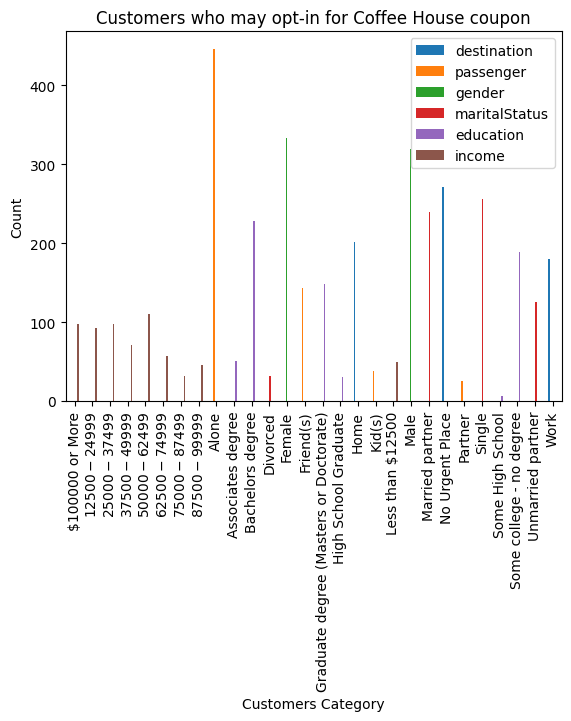

In [83]:
# Customers who did not opt-in to receive coffee house coupon but went to coffee house
data_cust_coffee_out = data.query('(Y == 0) and (coupon == "Coffee House") and (CoffeeHouse in ["1~3", "4~8", "gt8"])')
data_cust_coffee_out = data_cust_coffee_out[list_of_imp_attributes]
data_cust_coffee_out.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who may opt-in for Coffee House coupon')
plt.show()

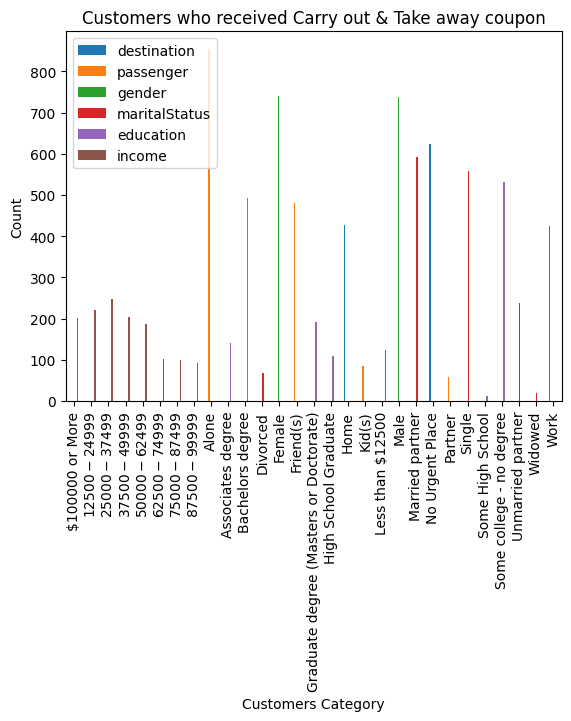

In [84]:
# Customers who did opt-in to receive Carry out & Take away coupon and went to Carry out & Take away
data_cust_togo_in = data.query('(Y == 1) and (coupon == "Carry out & Take away") and (CarryAway in ["1~3", "4~8", "gt8"])')
data_cust_togo_in = data_cust_togo_in[list_of_imp_attributes]
data_cust_togo_in.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who received Carry out & Take away coupon')
plt.show()

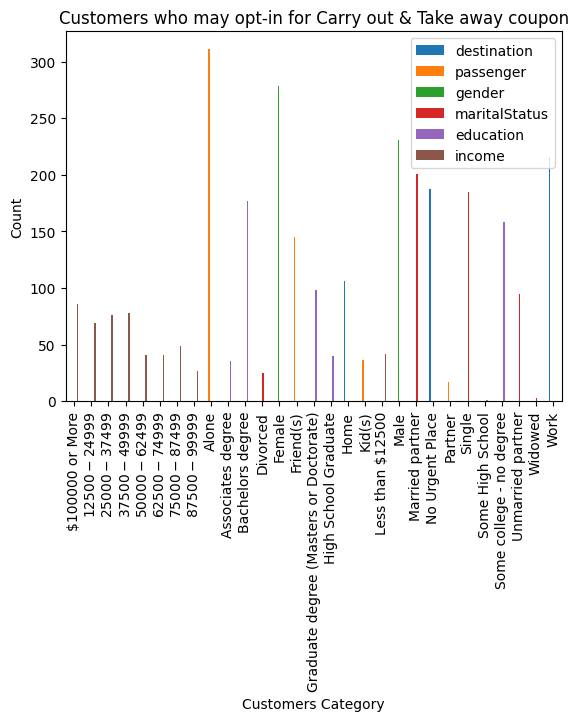

In [85]:
# Customers who did not opt-in to receive Carry out & Take away coupon and went to Carry out & Take away
data_cust_togo_out = data.query('(Y == 0) and (coupon == "Carry out & Take away") and (CarryAway in ["1~3", "4~8", "gt8"])')
data_cust_togo_out = data_cust_togo_out[list_of_imp_attributes]
data_cust_togo_out.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who may opt-in for Carry out & Take away coupon')
plt.show()

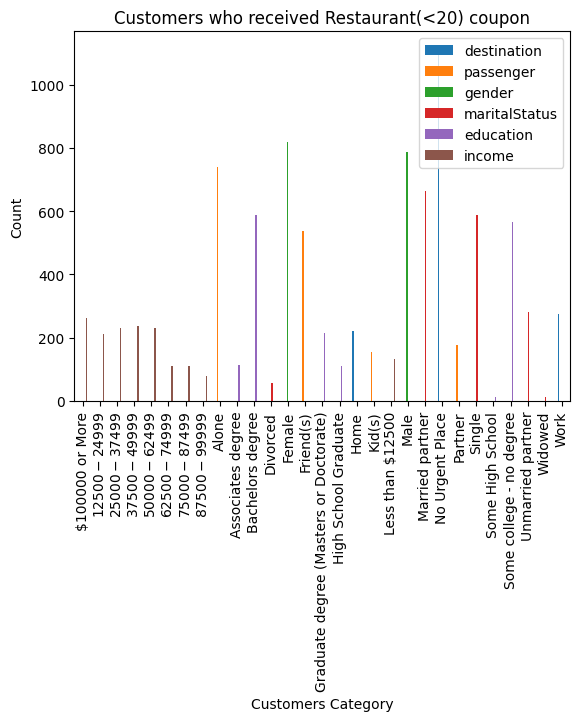

In [86]:
# Customers who did opt-in to receive Restaurant(<20) coupon and went to Restaurant(<20)
data_cust_restro20_in = data.query('(Y == 1) and (coupon == "Restaurant(<20)") and (RestaurantLessThan20 in ["1~3", "4~8", "gt8"])')
data_cust_restro20_in = data_cust_restro20_in[list_of_imp_attributes]
data_cust_restro20_in.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who received Restaurant(<20) coupon')
plt.show()

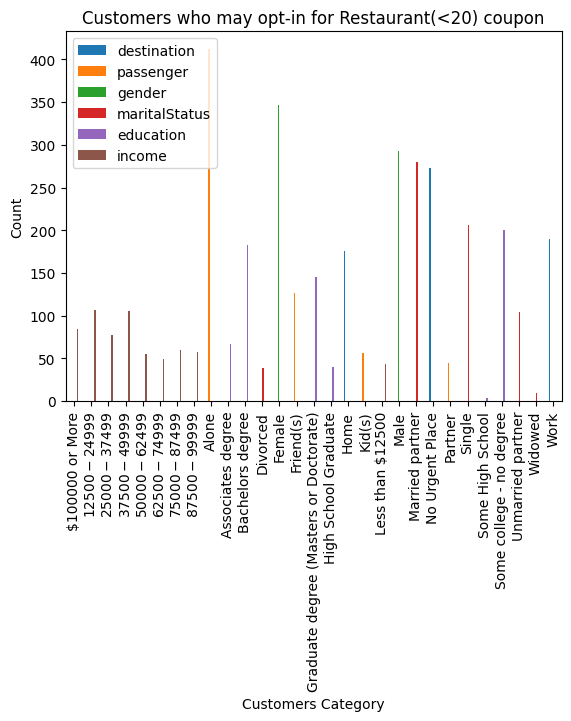

In [87]:
# Customers who did not opt-in to receive Restaurant(<20) coupon and went to Restaurant(<20)
data_cust_restro20_out = data.query('(Y == 0) and (coupon == "Restaurant(<20)") and (RestaurantLessThan20 in ["1~3", "4~8", "gt8"])')
data_cust_restro20_out = data_cust_restro20_out[list_of_imp_attributes]
data_cust_restro20_out.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who may opt-in for Restaurant(<20) coupon')
plt.show()

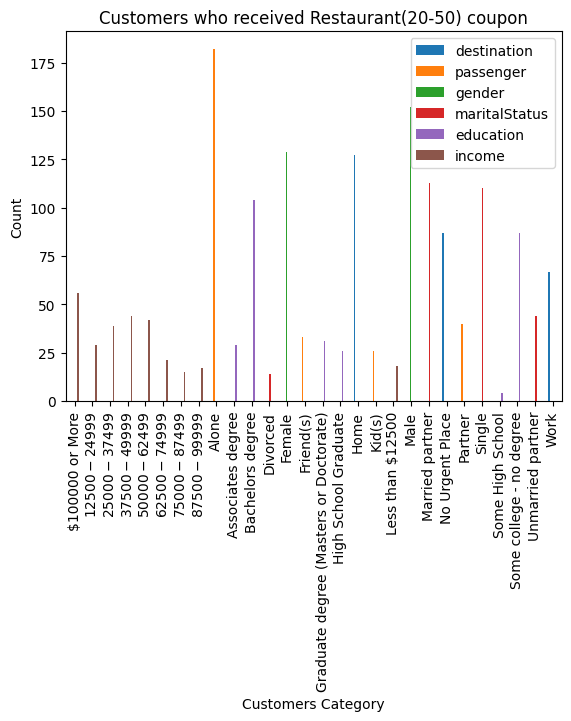

In [88]:
# Customers who did opt-in to receive Restaurant(20-50) coupon and went to Restaurant(20-50)
data_cust_restro50_in = data.query('(Y == 1) and (coupon == "Restaurant(20-50)") and (Restaurant20To50 in ["1~3", "4~8", "gt8"])')
data_cust_restro50_in = data_cust_restro50_in[list_of_imp_attributes]
data_cust_restro50_in.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who received Restaurant(20-50) coupon')
plt.show()

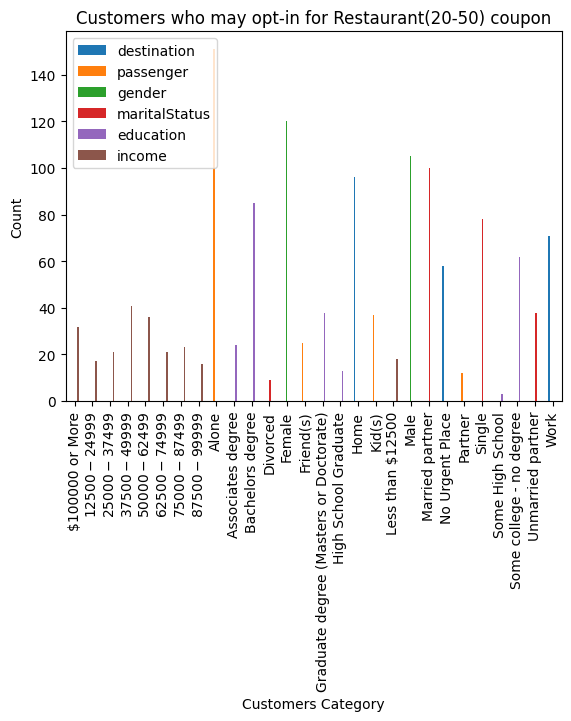

In [89]:
# Customers who did not opt-in to receive Restaurant(20-50) coupon and went to Restaurant(20-50)
data_cust_restro50_out = data.query('(Y == 0) and (coupon == "Restaurant(20-50)") and (Restaurant20To50 in ["1~3", "4~8", "gt8"])')
data_cust_restro50_out = data_cust_restro50_out[list_of_imp_attributes]
data_cust_restro50_out.apply(pd.Series.value_counts).fillna(0).plot(kind='bar')
plt.xlabel('Customers Category')
plt.ylabel('Count')
plt.title('Customers who may opt-in for Restaurant(20-50) coupon')
plt.show()

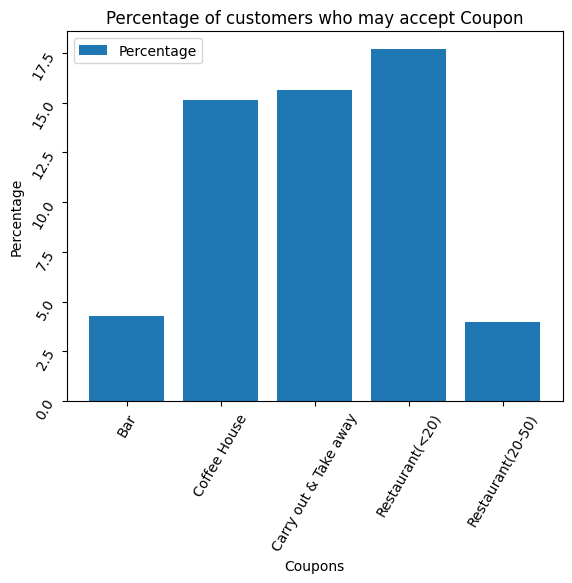

In [90]:
# Findings:
# Percentage of customers out of total data who may accept respective coupons
customer_coupon_bar = round((data_cust_bar_in.shape[0] + data_cust_bar_out.shape[0]) / data.shape[0] * 100, 2)
customer_coupon_coffee = round((data_cust_coffee_in.shape[0] + data_cust_coffee_out.shape[0]) / data.shape[0] * 100, 2)
customer_coupon_togo = round((data_cust_togo_in.shape[0] + data_cust_togo_out.shape[0]) / data.shape[0] * 100, 2)
customer_coupon_restro20 = round((data_cust_restro20_in.shape[0] + data_cust_restro20_out.shape[0]) / data.shape[0] * 100, 2)
customer_coupon_restro50 = round((data_cust_restro50_in.shape[0] + data_cust_restro50_out.shape[0]) / data.shape[0] * 100, 2)

fig, ax = plt.subplots()
ax.bar(['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)'],
 [customer_coupon_bar, customer_coupon_coffee, customer_coupon_togo, customer_coupon_restro20, customer_coupon_restro50], label='Percentage')
ax.set_ylabel('Percentage')
ax.set_xlabel('Coupons')
ax.set_title('Percentage of customers who may accept Coupon')
ax.tick_params(labelrotation=60)
ax.legend()
plt.show()

Next steps and recommendations:

* Car Column: Car column to know customer can download
onstar app to get coupon is very important. Given data set has maximum null values in Car column. And that too data with Y == 1 is even smaller.
* Location Columns: Since car data is not enough, location data (0 or 1) could be customer that are just passengers in others car or other method of commute and reach to destination. Or who just have the coupon and plan to utilize later even if its far or in opposite direction.
* Coupon Value: Everybody likes savings/discounts. It would be great if dataset has coupon value so customer can decide manage trip route based on their preference. Example: if coupon value is $20 per person for a new opening of restaurant and serve buffet, customer would be willing to go for manageable trip distance.


